### Import libraries

In [79]:
%matplotlib inline
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, InputLayer, Dense, Activation
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from tensorflow.keras import backend as K
from scipy.linalg import eigh
from sklearn import decomposition

In [113]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [114]:
X_train.shape, y_train.shape, X_test.shape

((60000, 784), (60000,), (10000, 784))

### Data Normalization

In [115]:
X_train = X_train/255
X_test = X_test/255

### PCA Implementation

In [116]:
def pca():
    standardized_scalar = StandardScaler()
    standardized_data = standardized_scalar.fit_transform(X_train)
    standardized_data.shape
    # Calculate covariance matrix
    cov_matrix = np.matmul(standardized_data.T, standardized_data)
    # Calculate eigenvalues and eigenvectors
    cov_matrix.shape
    lambdas, vectors = eigh(cov_matrix, eigvals=(782, 783))
    vectors = vectors.T
    vectors.shape
    #Calculate unit vectors U1=V1 and new coordinates
    new_coordinates = np.matmul(vectors, standardized_data.T)
    print(new_coordinates.shape)
    new_coordinates = np.vstack((new_coordinates, y_train)).T
    df_new = pd.DataFrame(new_coordinates, columns=["f1", "f2", "labels"])
    df_new.head()
    pca = decomposition.PCA()
    pca.n_components = 300
    pca_data = pca.fit_transform(standardized_data)
    percent_variance_retained = pca.explained_variance_ / np.sum(pca.explained_variance_)
    cum_variance_retained = np.cumsum(percent_variance_retained)
    plt.figure(1, figsize=(6, 3))
    plt.clf()
    plt.plot(cum_variance_retained, linewidth=2)
    plt.axis("tight")
    plt.grid()
    plt.xlabel("number of compoments")
    plt.ylabel("cumulative variance retained")
    plt.show()

(2, 60000)


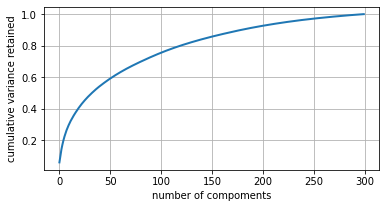

In [117]:
# Call when using PCA
pca()

### Preprocessing Data

In [118]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train.shape

(60000, 784)

In [124]:
y_train.shape

(60000, 10)

In [119]:
# Encoding the labels and making them as the class value and finally converting them as categorical values.
y_train = keras.utils.to_categorical(y_train, num_classes=10)

### Building NN Model

In [120]:
model = Sequential([Dense(128, input_shape=(784,)), 
                       Activation('sigmoid'),
                       Dense(64),
                       Activation('sigmoid'),
                       Dense(32),
                       Activation('sigmoid'),
                       Dense(10),
                       Activation('softmax')])
opt = SGD(lr=0.1) 
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [121]:
model_history = model.fit(X_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 200us/sample - loss: 1.6648 - accuracy: 0.4411
Epoch 2/10
60000/60000 [==============================] - 11s 190us/sample - loss: 0.5177 - accuracy: 0.8505
Epoch 3/10
60000/60000 [==============================] - 11s 187us/sample - loss: 0.3505 - accuracy: 0.8981
Epoch 4/10
60000/60000 [==============================] - 14s 233us/sample - loss: 0.2801 - accuracy: 0.9188
Epoch 5/10
60000/60000 [==============================] - 11s 189us/sample - loss: 0.2303 - accuracy: 0.9329
Epoch 6/10
60000/60000 [==============================] - 11s 186us/sample - loss: 0.1937 - accuracy: 0.9442
Epoch 7/10
60000/60000 [==============================] - 11s 181us/sample - loss: 0.1671 - accuracy: 0.9517
Epoch 8/10
60000/60000 [==============================] - 12s 195us/sample - loss: 0.1460 - accuracy: 0.9571
Epoch 9/10
60000/60000 [==============================] - 14s 239us/sample - loss: 0.1297 - accuracy: 0.9

### Model Evaluation - Without PCA

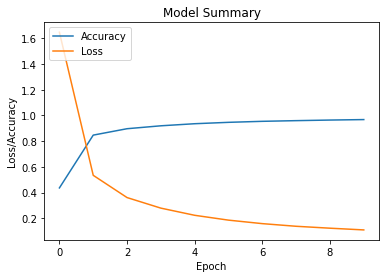

In [100]:
# Plot MODEL history
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['loss'])
plt.title('Model Summary')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')

In [101]:
prediction_hot = model.predict(X_test)
prediction = []

# convert from one-hot to prediction
for line in prediction_hot:
    prediction.append(np.argmax(line))

correct = 0
incorrect = 0

for i in prediction:
    if prediction[i] == y_test[i]:
        correct += 1
    else:
        incorrect += 1

accuracy = correct / y_test.shape[0]

print('Test Prediction Accuracy: ', accuracy * 100, '%')

Test Prediction Accuracy:  100.0 %


### Model Evaluation - With PCA

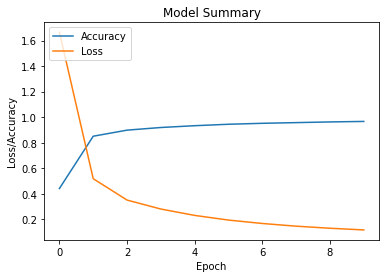

In [122]:
# Plot MODEL history
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['loss'])
plt.title('Model Summary')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper left')

In [123]:
prediction_hot = model.predict(X_test)
prediction = []

# convert from one-hot to prediction
for line in prediction_hot:
    prediction.append(np.argmax(line))

correct = 0
incorrect = 0

for i in prediction:
    if prediction[i] == y_test[i]:
        correct += 1
    else:
        incorrect += 1

accuracy = correct / y_test.shape[0]

print('Test Prediction Accuracy: ', accuracy * 100, '%')

Test Prediction Accuracy:  90.28 %
